## **HOMEWORK 14**

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras, random
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow import random as rnd
seed_value = 1234578790
seed(seed_value)
rnd.set_seed(seed_value)

### **Dataset**
The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

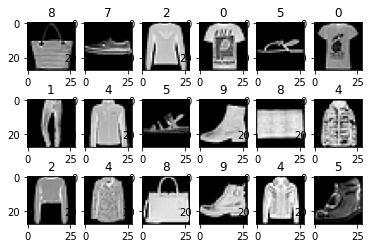

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### **Building the Classifier**
We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 50
batch_size = 64

start = time()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
print('Elapsed time', time() - start)

Epoch 1/50
938/938 [==============================] - 56s 59ms/step - loss: 0.3410 - accuracy: 0.8789 - val_loss: 0.3201 - val_accuracy: 0.8853
Epoch 2/50
938/938 [==============================] - 56s 59ms/step - loss: 0.2566 - accuracy: 0.9089 - val_loss: 0.2920 - val_accuracy: 0.8935
Epoch 3/50
938/938 [==============================] - 55s 59ms/step - loss: 0.2180 - accuracy: 0.9200 - val_loss: 0.3022 - val_accuracy: 0.8960
Epoch 4/50
938/938 [==============================] - 55s 59ms/step - loss: 0.1871 - accuracy: 0.9311 - val_loss: 0.3105 - val_accuracy: 0.8960
Epoch 5/50
938/938 [==============================] - 55s 59ms/step - loss: 0.1627 - accuracy: 0.9408 - val_loss: 0.3113 - val_accuracy: 0.8990
Epoch 6/50
938/938 [==============================] - 56s 59ms/step - loss: 0.1451 - accuracy: 0.9475 - val_loss: 0.3136 - val_accuracy: 0.9011
Epoch 7/50
938/938 [==============================] - 56s 59ms/step - loss: 0.1277 - accuracy: 0.9529 - val_loss: 0.3403 - val_accuracy:

Train Acc      0.9940166473388672
Validation Acc 0.8898000121116638


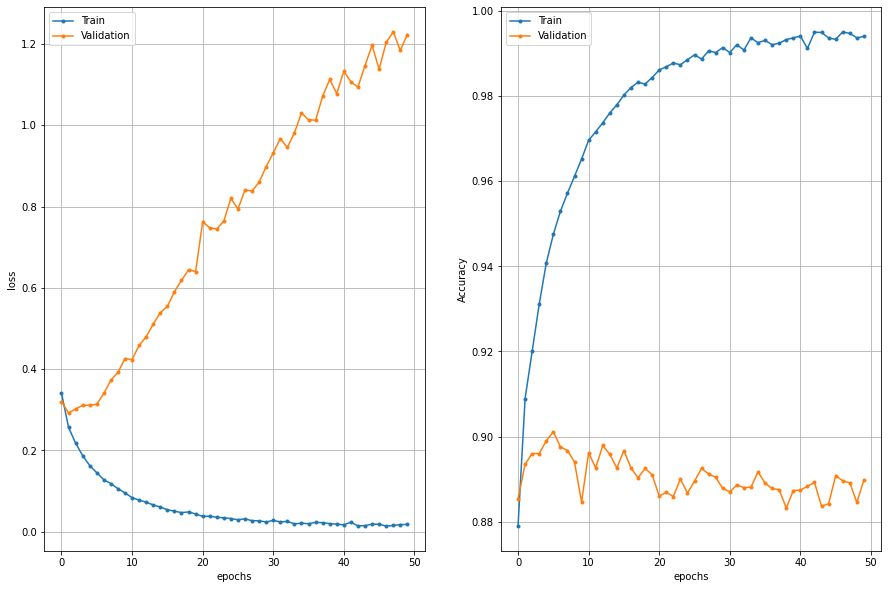

In [ ]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### **Combat the Overfitting!**
Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,

* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:

* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [ ]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs_no_overfitting = Input(shape=(28, 28, 1))
net_no_overfitting = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(inputs_no_overfitting)
net_no_overfitting = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting)
net_no_overfitting = Dropout(0.2)(net_no_overfitting)
net_no_overfitting = Flatten()(net_no_overfitting)
net_no_overfitting = Dense(128)(net_no_overfitting)
outputs_no_overfitting = Dense(10, activation="softmax")(net_no_overfitting)

model_no_overfitting = Model(inputs_no_overfitting, outputs_no_overfitting)
model_no_overfitting.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1605760   
                                                           

In [ ]:
from sklearn.utils import shuffle

def datagen(x_train, y_train, batch_size):
    num_samples = x_train.shape[0]
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x_train[idx:idx + batch_size, ...]
            y_ = y_train[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x_train, y_train = shuffle(x_train, y_train)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                    x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...])                                
                    
            yield x_, y_

In [ ]:
# Train the network
epochs_no_overfitting = 50
batch_size_no_overfitting = 64

steps_per_epoch = len(y_train) // batch_size_no_overfitting
generator = datagen(x_train, y_train, batch_size_no_overfitting)

model_no_overfitting.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start = time()
history_no_overfitting = model_no_overfitting.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs_no_overfitting, validation_data=(x_test, y_test))
print('Elapsed time', time() - start)

Epoch 1/50
937/937 [==============================] - 68s 72ms/step - loss: 0.4297 - accuracy: 0.8488 - val_loss: 0.3634 - val_accuracy: 0.8731
Epoch 2/50
937/937 [==============================] - 66s 71ms/step - loss: 0.3108 - accuracy: 0.8895 - val_loss: 0.3140 - val_accuracy: 0.8908
Epoch 3/50
937/937 [==============================] - 65s 69ms/step - loss: 0.2838 - accuracy: 0.8989 - val_loss: 0.2941 - val_accuracy: 0.8990
Epoch 4/50
937/937 [==============================] - 65s 69ms/step - loss: 0.2632 - accuracy: 0.9064 - val_loss: 0.2858 - val_accuracy: 0.8998
Epoch 5/50
937/937 [==============================] - 64s 69ms/step - loss: 0.2540 - accuracy: 0.9093 - val_loss: 0.2912 - val_accuracy: 0.8952
Epoch 6/50
937/937 [==============================] - 64s 68ms/step - loss: 0.2417 - accuracy: 0.9132 - val_loss: 0.2948 - val_accuracy: 0.8975
Epoch 7/50
937/937 [==============================] - 65s 69ms/step - loss: 0.2343 - accuracy: 0.9160 - val_loss: 0.2698 - val_accuracy:

Train Acc      0.9463880658149719
Validation Acc 0.9125999808311462


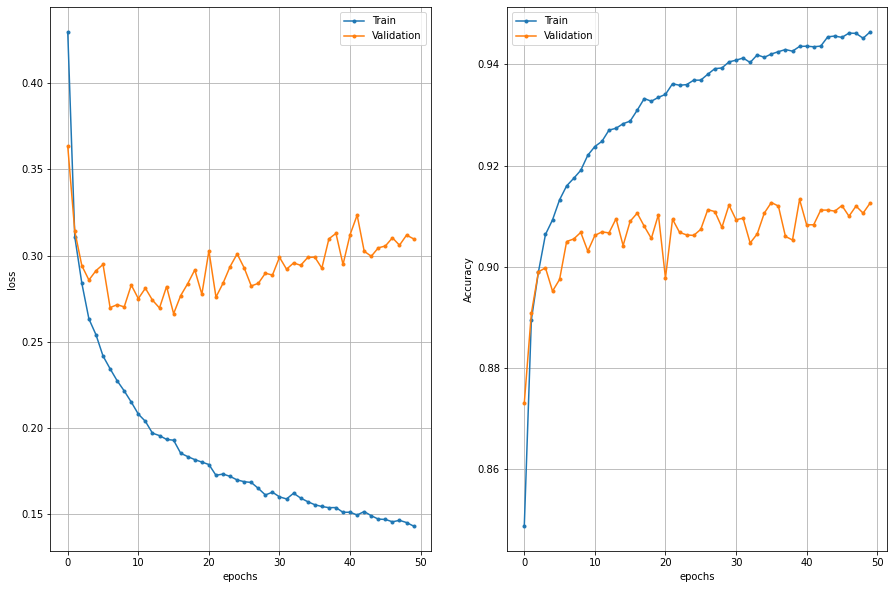

In [ ]:
# Show the results
plot_history(history_no_overfitting)

### **Questions**
* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

### **Answers**

To make result of CNN better I have added Pooling, Dropout and increased a number of neurons in Conv2D layer.

As a result, **origin** network has:

*Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0*

**modified** network has:

*Total params: 1,607,690
Trainable params: 1,607,690
Non-trainable params: 0*

Validation accuracy is **slighly higher 91%**. The actuall problem is that I have got no success to break this celling - 91%, all network modifications give me namely this result. The only good result is that they contain less trainable params.

In [ ]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs_no_overfitting_2 = Input(shape=(28, 28, 1))
net_no_overfitting_2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(net_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Flatten()(net_no_overfitting_2)
net_no_overfitting_2 = Dense(128)(net_no_overfitting_2)
outputs_no_overfitting_2 = Dense(10, activation="softmax")(net_no_overfitting_2)

model_no_overfitting_2 = Model(inputs_no_overfitting_2, outputs_no_overfitting_2)
model_no_overfitting_2.summary()

In [ ]:
# two Conv2D layers
# Total params: 211,690
# Trainable params: 211,690
# Non-trainable params: 0

inputs_no_overfitting_2 = Input(shape=(28, 28, 1))
net_no_overfitting_2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(net_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Flatten()(net_no_overfitting_2)
net_no_overfitting_2 = Dense(128)(net_no_overfitting_2)
outputs_no_overfitting_2 = Dense(10, activation="softmax")(net_no_overfitting_2)

model_no_overfitting_2 = Model(inputs_no_overfitting_2, outputs_no_overfitting_2)
model_no_overfitting_2.summary()

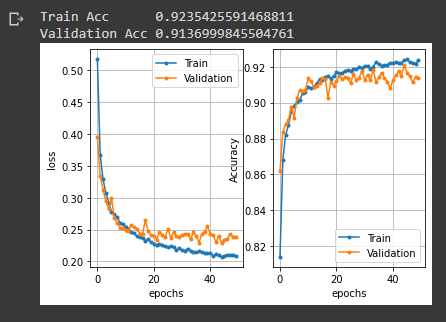

In [ ]:
# three Conv2D layers
# Total params: 57,098
# Trainable params: 57,098
# Non-trainable params: 0

inputs_no_overfitting_2 = Input(shape=(28, 28, 1))
net_no_overfitting_2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(net_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(net_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Flatten()(net_no_overfitting_2)
net_no_overfitting_2 = Dense(128)(net_no_overfitting_2)
outputs_no_overfitting_2 = Dense(10, activation="softmax")(net_no_overfitting_2)

model_no_overfitting_2 = Model(inputs_no_overfitting_2, outputs_no_overfitting_2)
model_no_overfitting_2.summary()

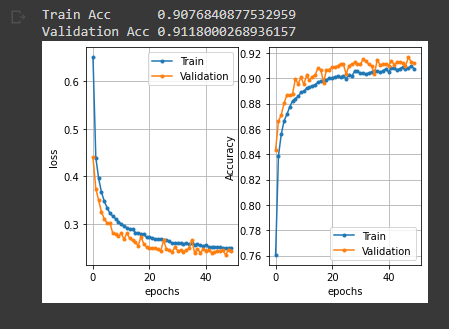

In [ ]:
# two Conv2D layers, BatchNormalization, Weight regularization
# Total params: 106,842
# Trainable params: 106,778
# Non-trainable params: 64

inputs_no_overfitting_2 = Input(shape=(28, 28, 1))

net_no_overfitting_2 = Conv2D(32,
                              kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                              bias_regularizer=keras.regularizers.L2(1e-4),
                              activity_regularizer=keras.regularizers.L2(1e-5),
                              kernel_size=(3, 3), activation="relu", padding='same'
                              )(inputs_no_overfitting_2)

net_no_overfitting_2 = BatchNormalization()(net_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Conv2D(16, kernel_size=(3, 3), activation="relu", padding='same')(net_no_overfitting_2)
net_no_overfitting_2 = MaxPooling2D(pool_size=(2, 2))(net_no_overfitting_2)
net_no_overfitting_2 = Dropout(0.2)(net_no_overfitting_2)

net_no_overfitting_2 = Flatten()(net_no_overfitting_2)
net_no_overfitting_2 = Dense(128,
                             kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                             bias_regularizer=keras.regularizers.L2(1e-4),
                             activity_regularizer=keras.regularizers.L2(1e-5)
                             )(net_no_overfitting_2)
outputs_no_overfitting_2 = Dense(10, activation="softmax",
                             kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                             bias_regularizer=keras.regularizers.L2(1e-4),
                             activity_regularizer=keras.regularizers.L2(1e-5)
                                 )(net_no_overfitting_2)

model_no_overfitting_2 = Model(inputs_no_overfitting_2, outputs_no_overfitting_2)
model_no_overfitting_2.summary()

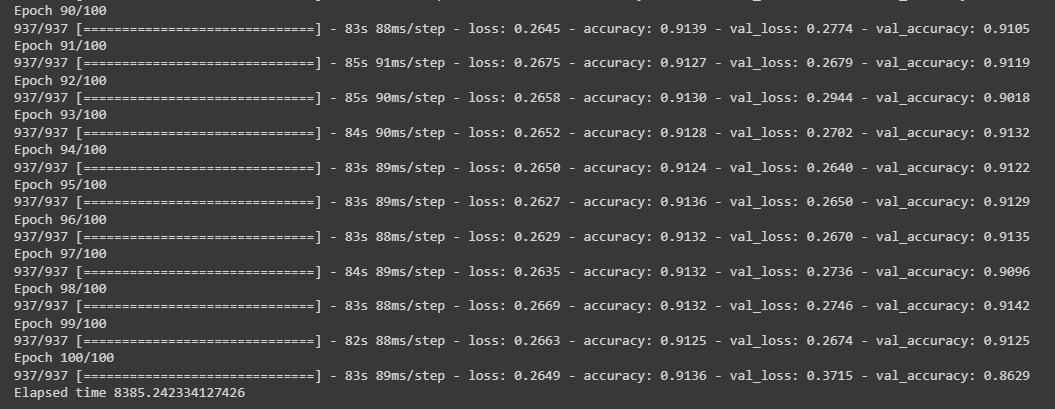

Data augmentation with *GaussianBlur* and *equalizeHist* was insufficent - possibly, realization is poor: I have tried, but use only image flip.

In [ ]:
def datagen_mirror_blurr_histequal(x_train, y_train, batch_size):
    num_samples = x_train.shape[0]
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x_train[idx:idx + batch_size, ...]
            y_ = y_train[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x_train, y_train = shuffle(x_train, y_train)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                  x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...])
                  #_picture = x_[idx_aug, ...].copy()*255
                  #x_[idx_aug, ...] = cv2.GaussianBlur(_picture.astype(np.uint8), ksize=(3,3), sigmaX=3) / 255
                  #x_[idx_aug, ...] = cv2.equalizeHist(_picture.astype(np.uint8)) / 255                             
                    
            yield x_, y_